In [1]:
!ls

InitialConditioncreator.ipynb  output.png
NN			       requirements.txt
PhysiCell		       sbi-logs
README.md		       simulator_3_pop_proportion.ipynb
env			       simulator_leader_cell_path.ipynb
inference.pkl		       simulatorwrap.ipynb


In [2]:
import os
os.chdir("PhysiCell")

In [4]:
import multiprocessing

cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

8

In [3]:
! ./project

Using config file ./config/PhysiCell_settings.xml ... 
Disabling automated spring adhesions and detachments!
1
dc? 1
User parameters in XML config file: 
Bool parameters:: 
normalize_ECM_influenced_motility_vector: 0 [dimensionless]
freeze_uE_profile: 0 [dimensionless]
enable_ecm_outputs: 1 [dimensionless]

Int parameters:: 
discrete_ECM_remodeling: 1 [dimensionless]
link_anisotropy_and_bias: 0 [dimensionless]
unit_test_setup: 0 [dimensionless]
march_unit_test_setup: 0 [dimensionless]

Double parameters:: 
initial_anisotropy: 0 [dimensionless]
initial_ECM_density: 0.5 [dimensionless]
chemotactic_substrate_decay_rate: 0.1 [1/minutes]
angle_of_chemical_field_gradient: 45 [dimensionless]
ECM_dx: 20 [um]
ECM_dy: 20 [um]
ECM_dz: 20 [um]
duration_of_uE_conditioning: 10 [minutes]

String parameters:: 
cell_setup: lesion [dimensionless]
chemical_field_setup: none [dimensionless]
ECM_orientation_setup: random [dimensionless]
cell_motility_ECM_interaction_model_selector: follower chemotaxis/no f

In [3]:
import csv
def change_csv_value(csv_file_path, row_index, column_index, new_value):
    # Read the CSV file into a list of lists
    with open(csv_file_path, 'r') as csv_file:
        reader = csv.reader(csv_file)
        data = list(reader)
    # Update the value of the specified cell
    if 0 <= row_index < len(data) and 0 <= column_index < len(data[row_index]):
        data[row_index][column_index] = str(new_value)

        # Save the modified data to the CSV file
        with open(csv_file_path, 'w', newline='') as csv_file:
            writer = csv.writer(csv_file)
            writer.writerows(data)

    else:
        print(f"Invalid row index ({row_index}) or column index ({column_index})")



In [4]:
import xml.etree.ElementTree as ET

def modify_xml_value(file_path, tag_path, new_value):
    tree = ET.parse(file_path)
    root = tree.getroot()
    element = root
    for tag in tag_path:
        element = element.find(tag)
        if element is None:
            print(f"Balise '{tag}' non trouvée dans le chemin spécifié.")
            return False
    element.text = str(new_value)
    tree.write(file_path, encoding="utf-8", xml_declaration=True)
    return True

In [15]:
tag_path = ["overall", "max_time"]
new_value = 2880
modify_xml_value("config/PhysiCell_settings.xml", tag_path, new_value)
print("Fichier XML modifié avec succès.")

Fichier XML modifié avec succès.


In [362]:
# Exemple d'appel de la fonction pour modifier l'intervalle dans <SVG>
tag_path = ["save", "SVG", "interval"]
new_value = 200
modify_xml_value("config/PhysiCell_settings.xml", tag_path, new_value)
tag_path = ["save", "full_data", "interval"]
modify_xml_value("config/PhysiCell_settings.xml", tag_path, new_value)
print("Fichier XML modifié avec succès.")

Fichier XML modifié avec succès.


In [6]:
tag_path = ["cell_definitions", "cell_definition[@name='follower cell']", "phenotype","mechanics", "cell_cell_repulsion_strength"]
new_value = 10
modify_xml_value("config/PhysiCell_settings.xml", tag_path, new_value)
tag_path = ["cell_definitions", "cell_definition[@name='follower cell']", "phenotype","mechanics", "cell_cell_adhesion_strength"]
new_value = 0.04
modify_xml_value("config/PhysiCell_settings.xml", tag_path, new_value)
tag_path = ["cell_definitions", "cell_definition[@name='follower cell']", "phenotype","death", "model[@name='apoptosis']", "death_rate"]
new_value = 5.31667e-05
modify_xml_value("config/PhysiCell_settings.xml", tag_path, new_value)


Fichier XML modifié avec succès.


In [8]:
modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='follower cell']", "phenotype","motility", "speed"], param1.item())
modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='follower cell']", "phenotype","mechanics", "cell_cell_repulsion_strength"], param2.item())
modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='follower cell']", "phenotype","mechanics", "cell_cell_adhesion_strength"], param3.item())
modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='follower cell']", "phenotype","death", "model[@name='apoptosis']", "death_rate"], param4.item())
change_csv_value('/home/aymeric/tumor-simulation/PhysiCell/config/rules.csv', 0, 4, param5.item()) #follower cell cycle entry
modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='microglia']", "phenotype","motility", "speed"], param6.item())
modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='microglia']", "phenotype","mechanics", "cell_cell_repulsion_strength"], param7.item())
modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='microglia']", "phenotype","mechanics", "cell_cell_adhesion_strength"], param8.item())
modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='microglia']", "phenotype","death", "model[@name='apoptosis']", "death_rate"], param9.item())
modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='microglia']", "phenotype","cell_interactions", "fusion_rates']", "death_rate", "fusion_rate[@name='astrocyte']"], param10.item())
modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='microglia']", "phenotype","cell_interactions", "fusion_rates']", "death_rate", "fusion_rate[@name='follower cell']"], param11.item())
change_csv_value('/home/aymeric/tumor-simulation/PhysiCell/config/rules.csv', 9, 4, param12.item()) #microglia cycle entry
modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='astrocyte']", "phenotype","motility", "speed"], param13.item())
modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='astrocyte']", "phenotype","mechanics", "cell_cell_repulsion_strength"], param14.item())
modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='astrocyte']", "phenotype","mechanics", "cell_cell_adhesion_strength"], param15.item())
modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='astrocyte']", "phenotype","death", "model[@name='apoptosis']", "death_rate"], param16.item())
change_csv_value('/home/aymeric/tumor-simulation/PhysiCell/config/rules.csv', 8, 4, param17.item()) #astrocyte cycle entry


True

In [26]:
tag_path = ["parallel", "omp_num_threads"]
new_value = 2
modify_xml_value("config/PhysiCell_settings.xml", tag_path, new_value)
print("Fichier XML modifié avec succès.")

Fichier XML modifié avec succès.


In [13]:
import time
import subprocess

start_time = time.time()

subprocess.run(["./project"] , stdout=subprocess.DEVNULL)

end_time = time.time()

execution_time = end_time - start_time

print(execution_time)

13.734835624694824


In [368]:
import time
import subprocess
min_time = 1000
min_i = 0
for i in range(8):
    times = 0
    for j in range(4):
        tag_path = ["parallel", "omp_num_threads"]
        new_value = i+1
        modify_xml_value("config/PhysiCell_settings.xml", tag_path, new_value)
        print("Fichier XML modifié avec succès.")
        start_time = time.time()

        subprocess.run(["./project"] , stdout=subprocess.DEVNULL)

        end_time = time.time()

        execution_time = end_time - start_time
        times += execution_time
    
    if times/4 < min_time:
        min_time = execution_time
        min_i = i+1
print(min_time, min_i)

Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XML modifié avec succès.
Fichier XM

In [6]:
import xml.etree.ElementTree as ET

def get_agent_count(svg_file_path):
    # Parse the SVG file
    tree = ET.parse(svg_file_path)
    root = tree.getroot()
    
    # Define the namespace
    namespaces = {'svg': 'http://www.w3.org/2000/svg'}
    
    # Find all text elements
    text_elements = root.findall('.//svg:text', namespaces)
    
    # Iterate through text elements to find the one containing the agent count
    for elem in text_elements:
        if 'agents' in elem.text:
            # Extract the number of agents from the text
            agent_count = int(''.join(filter(str.isdigit, elem.text)))
            return agent_count
    
    # If no agent count was found, return None or raise an exception
    return None

agent_count1 = get_agent_count('/home/aymeric/tumor-simulation/PhysiCell/output/final.svg')
print(agent_count1)

14


In [7]:
import numpy as np
import scipy.io
from math import sqrt
import subprocess
def get_count(path_mat):
    mat = scipy.io.loadmat(path_mat)
    id = mat['cells'][5]
    nuclei = mat['cells'][21]

    # Create boolean masks for each condition
    mask_id1 = (id == 1)
    mask_id3 = (id == 3)
    mask_id2 = (id == 2)
    mask_id2_nuclei1 = (id == 2) & (nuclei == 1)

    # Count the number of cells that satisfy each mask
    count_id1 = np.count_nonzero(mask_id1)
    count_id3 = np.count_nonzero(mask_id3)
    count_id2 = np.count_nonzero(mask_id2)
    count_id2_nuclei1 = np.count_nonzero(mask_id2_nuclei1)
    

    return count_id1, count_id3, count_id2_nuclei1, count_id2-count_id2_nuclei1
    #       follower cells, astrocytes, microglia + astro, microglia alone

get_count('/home/aymeric/tumor-simulation/PhysiCell/output/final_cells.mat')

(0, 0, 13, 1)

In [8]:
import torch
import pickle
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi
from sbi.utils.get_nn_models import posterior_nn
from sbi import utils as utils
from sbi import analysis as analysis

/home/aymeric/tumor-simulation/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
def simulation_wrapper(params):
    if len(params.shape) == 1:
        n = 1
    else:
        n = params.shape[0]
    
    results = torch.zeros(n, 1, 4)

    
    for i in range(n):
        if n == 1:
            param1 = params[0]
            param2 = params[1]
            param3 = params[2]
            param4 = params[3]
            param5 = params[4]
            param6 = params[5]
            param7 = params[6]
            param8 = params[7]
            param9 = params[8]
            param10 = params[9]
            param11 = params[10]
            param12 = params[11]
            param13 = params[12]
            param14 = params[13]
            param15 = params[14]
            param16 = params[15]
        else:
            param1 = params[i, 0]
            param2 = params[i, 1]
            param3 = params[i, 2]
            param4 = params[i, 3]
            param5 = params[i, 4]
            param6 = params[i, 5]
            param7 = params[i, 6]
            param8 = params[i, 7]
            param9 = params[i, 8]
            param10 = params[i, 9]
            param11 = params[i, 10]
            param12 = params[i, 11]
            param13 = params[i, 12]
            param14 = params[i, 13]
            param15 = params[i, 14]
            param16 = params[i, 15]
    
        modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='follower cell']", "phenotype","motility", "speed"], param1.item())
        modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='follower cell']", "phenotype","mechanics", "cell_cell_repulsion_strength"], param2.item())
        modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='follower cell']", "phenotype","mechanics", "cell_cell_adhesion_strength"], param3.item())
        modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='follower cell']", "phenotype","death", "model[@name='apoptosis']", "death_rate"], param4.item())
        change_csv_value('/home/aymeric/tumor-simulation/PhysiCell/config/rules.csv', 0, 4, param5.item()) #follower cell cycle entry
        modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='microglia']", "phenotype","motility", "speed"], param6.item())
        modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='microglia']", "phenotype","mechanics", "cell_cell_repulsion_strength"], param7.item())
        modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='microglia']", "phenotype","mechanics", "cell_cell_adhesion_strength"], param8.item())
        modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='microglia']", "phenotype","death", "model[@name='apoptosis']", "death_rate"], param9.item())
        modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='microglia']", "phenotype","cell_interactions", "fusion_rates", "fusion_rate[@name='astrocyte']"], param10.item())
        change_csv_value('/home/aymeric/tumor-simulation/PhysiCell/config/rules.csv', 9, 4, param11.item()) #microglia cycle entry
        modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='astrocyte']", "phenotype","motility", "speed"], param12.item())
        modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='astrocyte']", "phenotype","mechanics", "cell_cell_repulsion_strength"], param13.item())
        modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='astrocyte']", "phenotype","mechanics", "cell_cell_adhesion_strength"], param14.item())
        modify_xml_value("config/PhysiCell_settings.xml", ["cell_definitions", "cell_definition[@name='astrocyte']", "phenotype","death", "model[@name='apoptosis']", "death_rate"], param15.item())
        change_csv_value('/home/aymeric/tumor-simulation/PhysiCell/config/rules.csv', 8, 4, param16.item()) #astrocyte cycle entry

        subprocess.run(["./project"] , stdout=subprocess.DEVNULL)

        count = get_count('/home/aymeric/tumor-simulation/PhysiCell/output/final_cells.mat')
        agent_count = get_agent_count('/home/aymeric/tumor-simulation/PhysiCell/output/final.svg')
        
        results[i, 0, :] = torch.tensor([count[0]/agent_count*100,count[1]/agent_count*100,count[2]/agent_count*100,count[3]/agent_count*100 ])
            #follower cells, astrocytes, microglia + astro, microglia alone
    return results.flatten()


In [9]:
# 1 - 5 : follower cell
# 1 speed 2 repulsion 3 adhesion 4 death 5 cycle entry
# 6 - 11 : microglia
# 6 speed 7 repulsion 8 adhesion 9 death 10 fusion follower 11 cycle entry
# 12 - 16 : astrocyte
# 12 speed 13 repulsion 14 adhesion 15 death 16 cycle entry
simulation_wrapper(torch.tensor([0.5, 10, 0.004, 1e-6, 0.0007, 0.5, 10, 0.004, 1e-6, 0.0001, 0.0007, 0.5, 10, 0.04, 1e-6, 0.0007]))
# returns 1: nb_tumor_cells, 2: nb_dead_cells, 3: nb_microglia, 4: nb_astrocytes

#tensor([5.1221e-01, 1.4908e+01, 6.4771e+00, 6.3902e-03, 9.4128e-04, 4.9932e-01,
#        1.6091e+01, 6.0108e+00, 2.7775e-03, 7.1733e-04, 9.2412e-04, 4.9178e-01,
#        1.5085e+01, 6.3847e+00, 1.8126e-03, 1.0153e-03])

tensor([0.2476, 0.3164, 0.3714, 0.0646])

In [12]:
num_dim = 16
# 1 - 5 : follower cell
# 1 speed 2 repulsion 3 adhesion 4 death 5 cycle entry
# 6 - 11 : microglia
# 6 speed 7 repulsion 8 adhesion 9 death 10 fusion astrocyte 11 cycle entry
# 12 - 16 : astrocyte
# 12 speed 13 repulsion 14 adhesion 15 death 16 cycle entry
low =  torch.tensor([0,  5,  0,    0,     0, 0,  5,  0,    0,     0,     0, 0,  5,  0,    0,     0])
high = torch.tensor([1, 25, 10, 1e-2, 0.002, 1, 25, 10, 1e-2, 0.001, 0.002, 1, 25, 10, 1e-2, 0.002])

# Créer le prior uniforme avec les bornes spécifiées
prior = utils.BoxUniform(low=low, high=high)

In [14]:
simulator, prior = prepare_for_sbi(simulation_wrapper, prior)

In [15]:
inference = SNPE(prior=prior)

In [19]:
theta, x = simulate_for_sbi(simulator, proposal=prior, num_simulations=2)

Running 2 simulations.: 100%|██████████| 2/2 [00:46<00:00, 23.49s/it]


# SAVE SIMULATED DATA

In [10]:
with open("/home/aymeric/tumor-simulation/NN/prop/simulated_data20000.pkl", "wb") as handle:
    pickle.dump((theta, x), handle)

NameError: name 'theta' is not defined

In [ ]:
inference = inference.append_simulations(theta, x)

In [ ]:
density_estimator = inference.train()

# SAVE DENSITY ESTIMATOR

In [ ]:
with open("/home/aymeric/tumor-simulation/NN/prop/density_estimator20000.pkl", "wb") as handle:
    pickle.dump(density_estimator, handle)

# LOAD DATA

In [ ]:
with open("/home/aymeric/tumor-simulation/NN/prop/simulated_data20000.pkl", "rb") as handle:
    theta, x = pickle.load(handle)

inference = inference.append_simulations(theta, x)

# LOAD DENSITY ESTIMATOR

In [ ]:
with open("/home/aymeric/tumor-simulation/NN/prop/density_estimator20000.pkl", "rb") as handle:
    density_estimator= pickle.load(handle)

In [20]:
posterior = inference.build_posterior(density_estimator)

In [25]:
theta = torch.tensor([0.5, 10, 0.004, 1e-6, 0.0007, 0.5, 10, 0.004, 1e-6, 0.0001, 0.0007, 0.5, 10, 0.04, 1e-6, 0.0007])
x_o = simulation_wrapper(theta)
print(x_o)

tensor([0.2930, 0.2861, 0.3673, 0.0536])


In [28]:
            #follower cells, astrocytes, microglia + astro, microglia alone

x_o = torch.tensor([17.3, 42.6, 16.3, 23.3])

tensor([17.3000, 42.6000, 16.3000, 23.3000])


Drawing 100000 posterior samples: 100009it [01:03, 1566.95it/s]


tensor([5.1221e-01, 1.4908e+01, 6.4771e+00, 6.3902e-03, 9.4128e-04, 4.9932e-01,
        1.6091e+01, 6.0108e+00, 2.7775e-03, 7.1733e-04, 9.2412e-04, 4.9178e-01,
        1.5085e+01, 6.3847e+00, 1.8126e-03, 1.0153e-03])
tensor([20.5882, 47.0588, 23.5294,  8.8235])
tensor(73.1315)
tensor([5.1221e-01, 1.4908e+01, 6.4771e+00, 6.3902e-03, 9.4128e-04, 4.9932e-01,
        1.6091e+01, 6.0108e+00, 2.7775e-03, 7.1733e-04, 9.2412e-04, 4.9178e-01,
        1.5085e+01, 6.3847e+00, 1.8126e-03, 1.0153e-03])
tensor([ 1.2215e-02,  4.9082e+00,  6.4731e+00,  6.3892e-03,  2.4128e-04,
        -6.7762e-04,  6.0908e+00,  6.0068e+00,  2.7765e-03,  6.1733e-04,
         2.2412e-04, -8.2195e-03,  5.0850e+00,  6.3447e+00,  1.8116e-03,
         3.1526e-04])
tensor(2.1828)


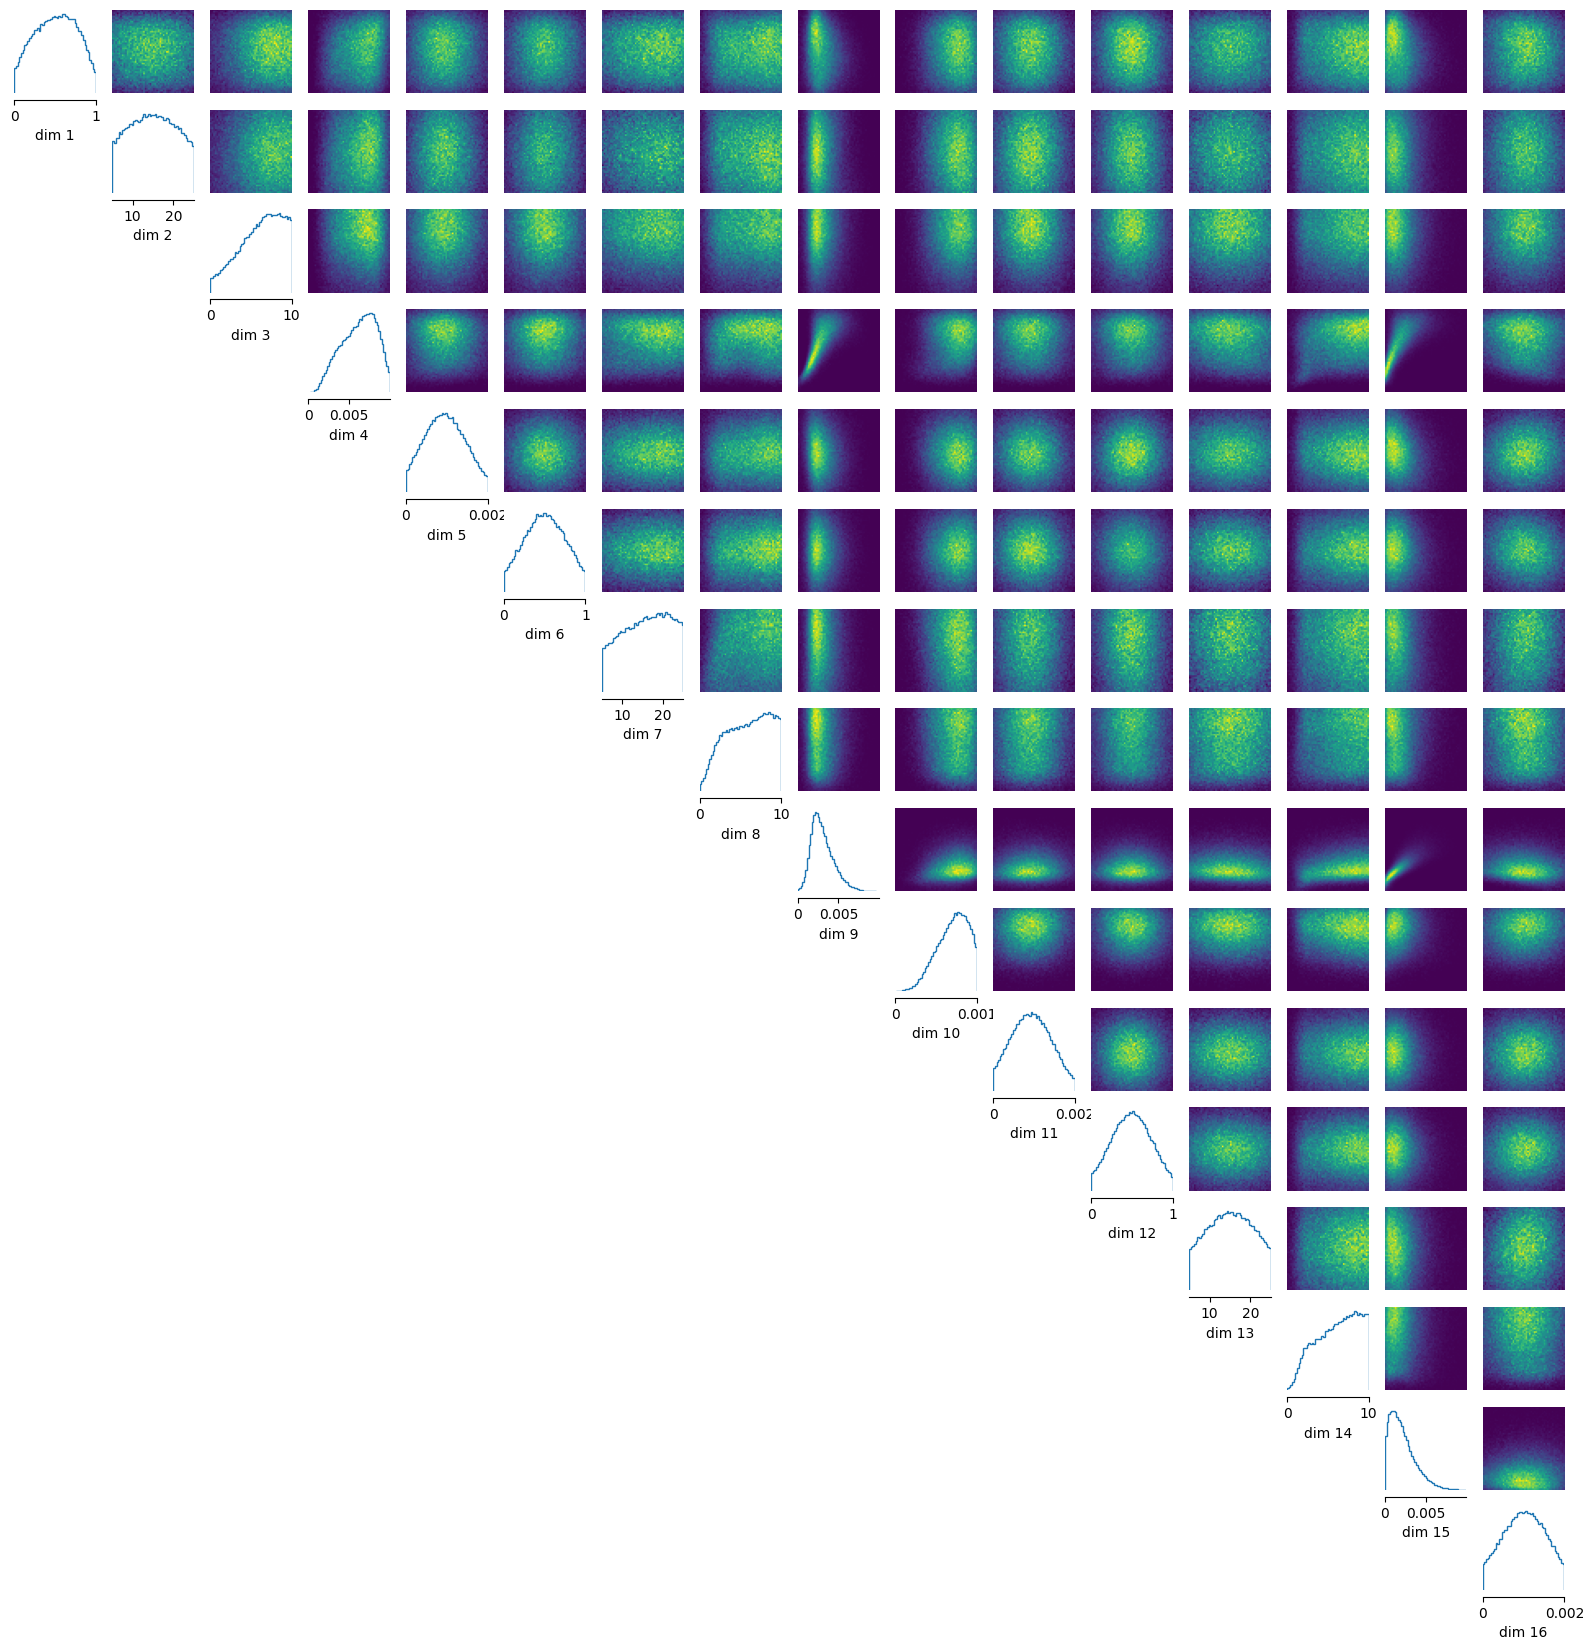

In [29]:
print(x_o)
posterior_samples = posterior.sample((100000,), x=x_o)

# plot posterior samples
_ = analysis.pairplot(
    posterior_samples, limits=[[0, 1], [5, 25], [0, 10], [0, 1e-2], [0, 0.002], [0, 1], [5, 25], [0, 10], [0, 1e-2], [0, 0.001], [0, 0.002], [0, 1], [5, 25], [0, 10], [0, 1e-2], [0, 0.002]], figsize=(20, 20)
)
predicted_params = posterior_samples.median(dim=0).values
print(posterior_samples.median(dim=0).values)
predicted_tensor = simulation_wrapper(posterior_samples.median(dim=0).values)
print(predicted_tensor)
mse = torch.mean((x_o - predicted_tensor)**2)
print(mse)
print(predicted_params)
print(predicted_params - theta)
print(torch.mean(predicted_params - theta))